In [1]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')

/Users/neway/software/anaconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


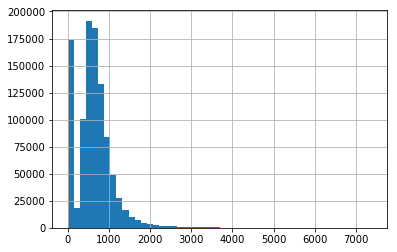

In [3]:
import seaborn as sns
%matplotlib inline

train_df['Customers'].hist(bins=50)

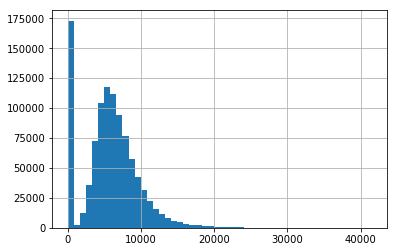

In [5]:
train_df['Sales'].hist(bins=50)

In [6]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


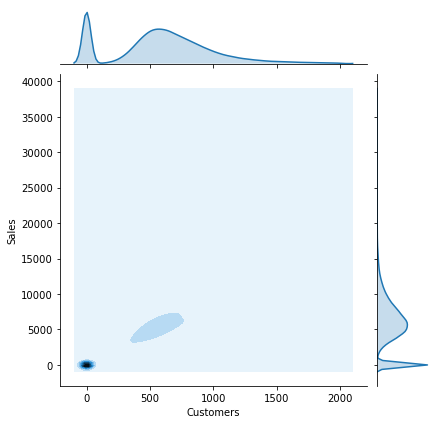

In [7]:
sample_df = train_df.loc[train_df['Customers'] < 2000].sample(100000)

sns.jointplot(sample_df['Customers'], sample_df['Sales'], kind="kde")

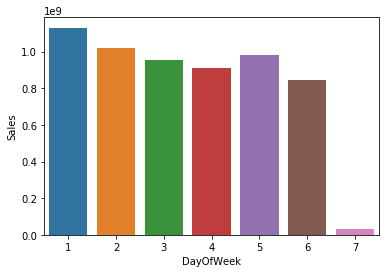

In [8]:
dayOfWeek_Sales = train_df.groupby('DayOfWeek')['Sales'].agg('sum').reset_index()

sns.barplot(x=dayOfWeek_Sales['DayOfWeek'], y=dayOfWeek_Sales['Sales'])

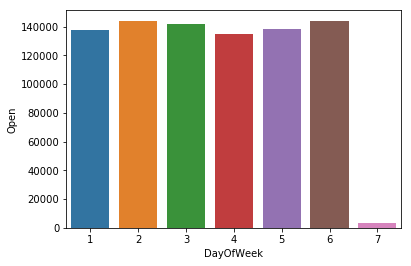

In [9]:
open_days = train_df.groupby('DayOfWeek')['Open'].agg('sum').reset_index()

sns.barplot(x=open_days['DayOfWeek'], y=open_days['Open'])

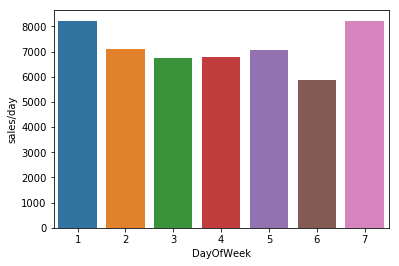

In [10]:
dayAvgSales = dayOfWeek_Sales.merge(open_days, how='inner', on = ['DayOfWeek'])
dayAvgSales['sales/day'] = dayAvgSales['Sales'] / dayAvgSales['Open']

sns.barplot(x=dayAvgSales['DayOfWeek'], y=dayAvgSales['sales/day'])

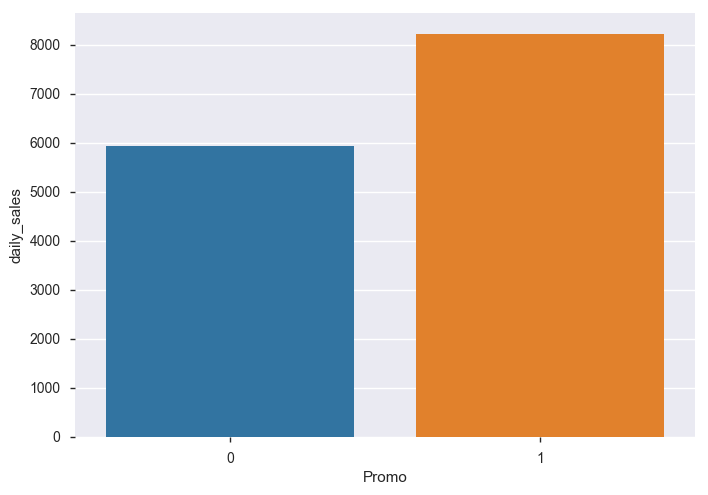

In [36]:
promo_sales = train_df.loc[train_df['Open'] == 1].groupby('Promo')['Sales'].agg(['sum', 'count']).reset_index()

promo_sales['daily_sales'] = promo_sales['sum']/promo_sales['count']

sns.barplot(x=promo_sales['Promo'], y=promo_sales['daily_sales'])

In [12]:
promo_day_sales = train_df.loc[train_df['Open'] == 1].groupby(['Promo', 'DayOfWeek'])['Sales'].agg(['sum', 'count']).reset_index()

promo_day_sales['sales/store'] = promo_day_sales['sum']/promo_day_sales['count']

promo_day_sales.rename(columns={'sum': 'total_sales', 'count': 'store_num'})


,Promo,DayOfWeek,sum,count,sales/store
0,0,1,375323829,60317,6222.521495
1,0,2,382090703,66843,5716.241087
2,0,3,368921884,65679,5617.044778
3,0,4,347985910,60521,5749.837412
4,0,5,421782843,66485,6344.030127
5,0,6,846317735,144058,5874.840238
6,0,7,29551433,3593,8224.723908
7,1,1,754879183,77243,9772.784369
8,1,2,638321227,77118,8277.201522
9,1,3,586040979,76257,7685.077816


In [15]:
promo_day_sales.head(20)

,Promo,DayOfWeek,sum,count,sales/store
0,0,1,375323829,60317,6222.521495
1,0,2,382090703,66843,5716.241087
2,0,3,368921884,65679,5617.044778
3,0,4,347985910,60521,5749.837412
4,0,5,421782843,66485,6344.030127
5,0,6,846317735,144058,5874.840238
6,0,7,29551433,3593,8224.723908
7,1,1,754879183,77243,9772.784369
8,1,2,638321227,77118,8277.201522
9,1,3,586040979,76257,7685.077816


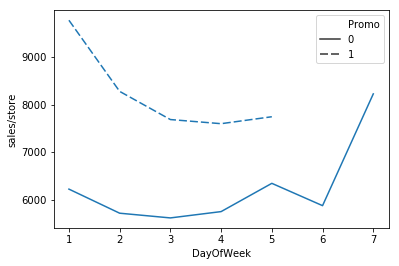

In [14]:
sns.lineplot(x=promo_day_sales['DayOfWeek'], y=promo_day_sales['sales/store'], style=promo_day_sales['Promo'])


In [30]:
train_df['StateHoliday'] = train_df['StateHoliday'].astype('str')

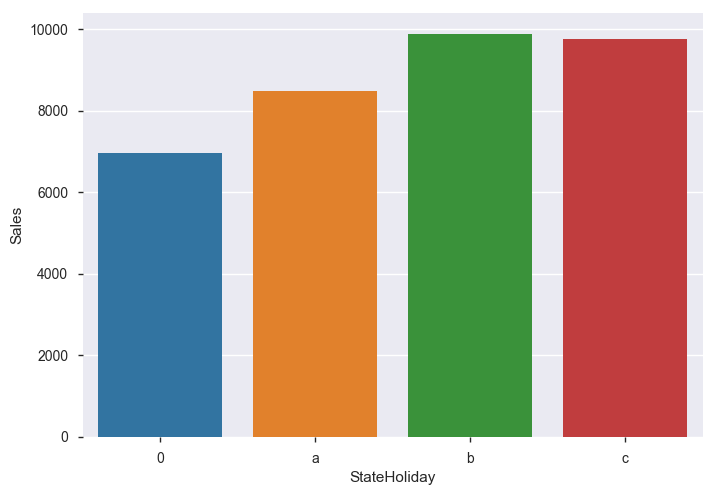

In [38]:
sales_df = train_df.loc[train_df['Open'] == 1]
stateHoliday_sale = sales_df.groupby('StateHoliday').agg({'Sales':'mean'}).reset_index()

sns.barplot(x=stateHoliday_sale['StateHoliday'], y=stateHoliday_sale['Sales'])


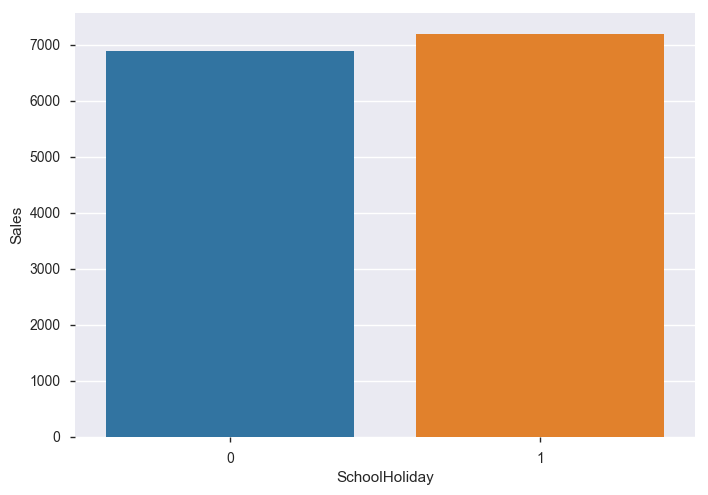

In [39]:
schoolholiday_sales = sales_df.groupby('SchoolHoliday').agg({'Sales': 'mean'}).reset_index()

sns.barplot(x='SchoolHoliday', y='Sales', data=schoolholiday_sales)

In [40]:
store_df = pd.read_csv('data/store.csv')

In [44]:
store_sales = sales_df.groupby('Store').agg({'Sales':'mean'}).reset_index()

In [45]:
store_df = store_df.merge(store_sales, on='Store')

In [46]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
431,432,a,a,810.0,5.0,2013.0,0,NaN,NaN,NaN,10982.871173
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,8817.050891
50,51,a,c,10570.0,7.0,2013.0,1,9.0,2011.0,"Jan,Apr,Jul,Oct",6675.286174
411,412,d,c,4460.0,NaN,NaN,1,39.0,2010.0,"Jan,Apr,Jul,Oct",9102.122186
296,297,a,a,2300.0,9.0,2010.0,0,NaN,NaN,NaN,6992.070785
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN,4531.910600
222,223,d,c,2920.0,10.0,1995.0,1,27.0,2011.0,"Jan,Apr,Jul,Oct",7232.875959
570,571,d,a,2110.0,11.0,1995.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",7742.750804
822,823,a,c,16210.0,11.0,2010.0,0,NaN,NaN,NaN,5802.383929
771,772,d,c,1850.0,NaN,NaN,0,NaN,NaN,NaN,3582.199234


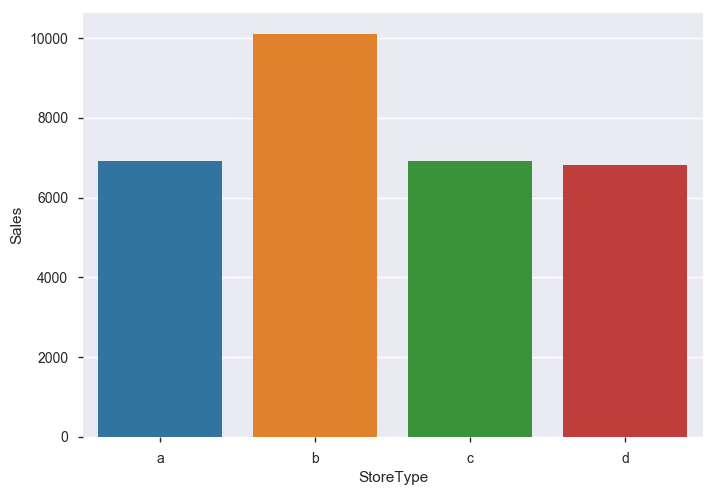

In [48]:
storeType_sales = store_df.groupby('StoreType').agg({'Sales':'mean'}).reset_index()

sns.barplot(x='StoreType', y='Sales', data=storeType_sales)

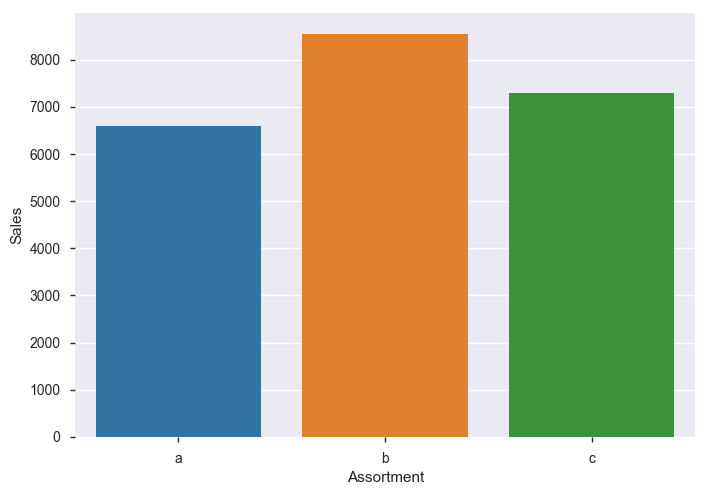

In [49]:
assortment_sales = store_df.groupby('Assortment').agg({'Sales':'mean'}).reset_index()

sns.barplot(x='Assortment', y='Sales', data=assortment_sales)

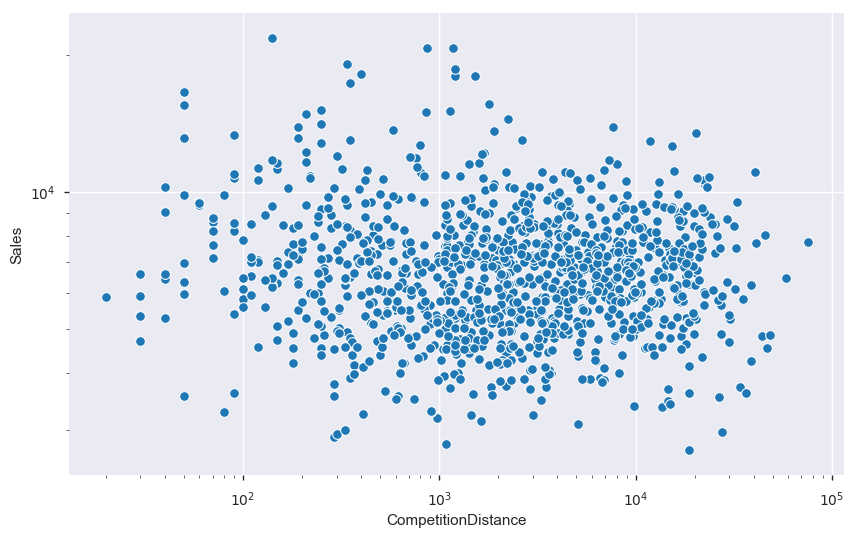

In [62]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(x='CompetitionDistance', y='Sales', data=store_df.loc[store_df['CompetitionDistance'] > 0])

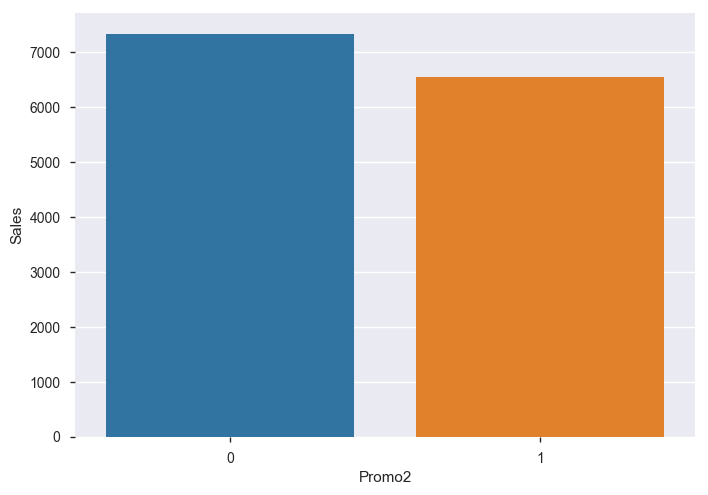

In [63]:
promo2_sales = store_df.groupby('Promo2').agg({'Sales':'mean'}).reset_index()

sns.barplot(x='Promo2', y='Sales', data=promo2_sales)


In [42]:
pandas_profiling.ProfileReport(store_df)



Number of variables,10
Number of observations,1115
Total Missing (%),21.0%
Total size in memory,87.2 KiB
Average record size in memory,80.1 B
Numeric,7
Categorical,3
Date,0
Text (Unique),0
Rejected,0
Distinct count,3


In [64]:
test_df = pd.read_csv('data/test.csv')

In [72]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


#### 基准模型

In [75]:
predict_df = train_df.groupby(['Store', 'DayOfWeek', 'Open', 'Promo']).agg({'Sales': 'mean'}).reset_index()

predict_df.sample(10)

,Store,DayOfWeek,Open,Promo,Sales
8437,403,2,1,1,9043.263889
21547,1027,1,0,0,0.000000
14090,672,4,0,1,0.000000
10233,489,1,0,1,0.000000
19167,914,1,0,0,0.000000
1597,76,5,1,1,10135.849057
212,11,3,1,1,9446.084507
15655,747,2,1,1,9635.084507
4895,233,4,0,1,0.000000
10488,501,1,1,1,7218.789474


In [81]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 5 columns):
Store        23405 non-null int64
DayOfWeek    23405 non-null int64
Open         23405 non-null int64
Promo        23405 non-null int64
Sales        23405 non-null float64
dtypes: float64(1), int64(4)
memory usage: 914.3 KB


In [86]:
test_df = test_df.fillna(0)

test_df['Open'] = test_df['Open'].astype('int')

In [88]:
predict_result = test_df.merge(predict_df, how='left', on=['Store', 'DayOfWeek', 'Open', 'Promo'])

In [92]:
kaggle_result_csv = predict_result[['Id', 'Sales']].fillna(0)

In [95]:
kaggle_result_csv.to_csv('kaggle_baseline.csv', index=False)